In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

<AxesSubplot: xlabel='0', ylabel='1'>

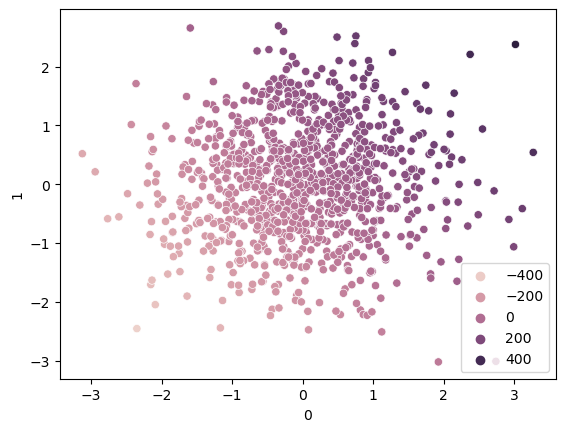

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=10)

In [6]:
from sklearn.svm import SVR

In [7]:
svr=SVR(kernel='linear')

In [8]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [9]:
svr.coef_

array([[95.43179545, 80.42733662]])

In [10]:
y_pred= svr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
print(r2_score(y_pred,y_test))

0.9993607574159546


In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
paramG= {'C':[0.1,1,10,100,1000],
        'gamma':[1,.1,0.01,0.001,0.0001],
        'kernel':['linear'],
        'epsilon':[0.1,0.2,0.3]
        }

In [15]:
gsvr=GridSearchCV(SVR(),param_grid=paramG,refit=True,cv=5,scoring='neg_mean_squared_error')

In [16]:
gsvr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [17]:
y_pred = gsvr.predict(X_test)

In [18]:
print(r2_score(y_pred,y_test))

0.9993845941384685


In [19]:
gsvr.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

<AxesSubplot: >

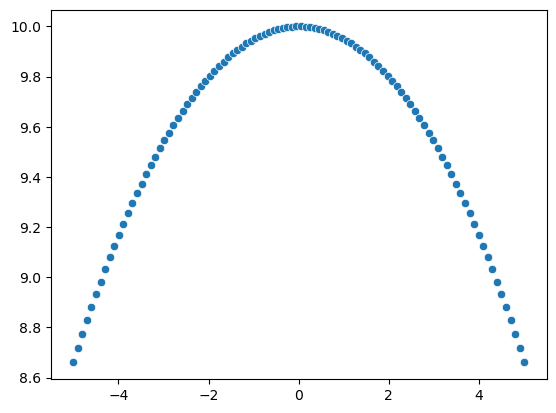

In [33]:
x=np.linspace(-5,5,100)
y=np.sqrt(10**2-x**2)
sns.scatterplot(x=x,y=y)

ValueError: x and y must be the same size

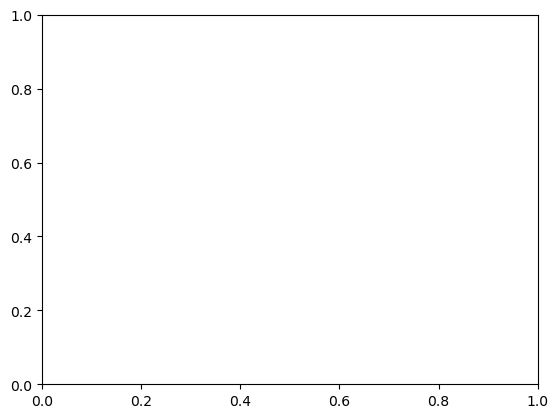

In [38]:
y=np.hstack([y,-y])
x=np.hstack([x,-x])
plt.scatter(x,y)